# Business Understanding
For this project, I was interestested in using Stack Overflow data from 2019 to better understand trends in women programmers vs men:

1. What are 2019 general trends in number of programmers across the world?
2. What is the salary difference in Women VS Men in US and Other countries?
3. How is the Career and Job satisfication of the programmers in US vs Other countries?


In [235]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Data Understanding
First, we provide a general view to our data. for example, which country has max no of programmers. Whats teh ratio of Women programmers vs Men programmers.

In [236]:
df= pd.read_csv('survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [237]:
# Data Understanding
def display_bar_chart(df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

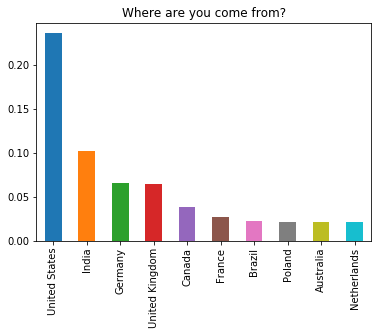

In [238]:
#Provide a pandas series of the counts for each Country
display_bar_chart(df, "Country", "Where are you come from?")

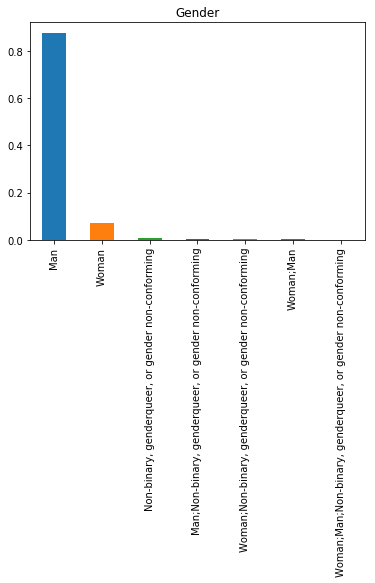

In [239]:
# Lets focus on Man vs Women programmers
#Provide a pandas series of the counts for each Professional status
display_bar_chart(df, "Gender", "Gender")

The no of women programmers is v.less compared to men programmmers - ratio around 1:10. 


In [240]:
#Add a new column to separate data into US and other countries
def handling_country(df):
    '''
    
    Return a dataframe with country separate into US and Other
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    df: a dataframe with a new column US_or_other
    
    '''
    # For Categorical variables "Country", we seperate them into 
    # 2 sessions: US and other
    # The following lists define the countries to US and Other
    US = ['United States']

      
    #Add a new catagory seperating to western and eastern
    df['US_or_other'] = df['Country'].apply(lambda x: 'US' if x in US else 'other')
    
    return df



Here we select some useful columns for our analysis.

Country: Country they are living
YearsCodePro: Years they are coding professionally
Employment: Their employment status
ConvertedComp: Their Salary in USD
JobSat & CareerSat: Are their satisfy their job and career

We especially focus on employed full-time professional developer and split into 2 datasets - based on Man/Woman Gender.

DATA PREPARATION 

In [241]:
def data_preparation_woman(df):
    '''
    
    Return useful columns with query condition
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    useful_df: a filtered dataframe with only useful columns
    
    '''
    #Get some useful columns for analysis
    useful_columns = ['Country', 'YearsCode', 'Employment', 'CareerSat', 'JobSat', 'WorkWeekHrs', 'ConvertedComp', 'US_or_other', 'Gender', 'WorkRemote']
    useful_df = pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and (Gender == 'Woman') and Employment == 'Employed full-time'"))[useful_columns]
    return useful_df

In [242]:
def data_preparation_man(df):
    '''
    
    Return useful columns with query condition
    
    Parameters:
    df: a raw data dataframe
    
    Returns:
    useful_df: a filtered dataframe with only useful columns
    '''
    #Get some useful columns for analysis
    useful_columns = ['Country', 'YearsCode', 'Employment', 'CareerSat', 'JobSat', 'WorkWeekHrs', 'ConvertedComp', 'US_or_other', 'Gender', 'WorkRemote']
    useful_df = pd.DataFrame(df.query("MainBranch == 'I am a developer by profession' and Gender == 'Man' and Employment == 'Employed full-time'"))[useful_columns]
    return useful_df    


In [243]:

#Get some useful columns for analysis - dataset for Man and Woman genders
df = handling_country(df)
useful_df_man = data_preparation_man(df)
useful_df_man.head(4)

,Country,YearsCode,Employment,CareerSat,JobSat,WorkWeekHrs,ConvertedComp,US_or_other,Gender,WorkRemote
3,United States,3,Employed full-time,Very satisfied,Slightly satisfied,80.0,61000.0,US,Man,Less than once per month / Never
4,Ukraine,16,Employed full-time,Very dissatisfied,Slightly dissatisfied,55.0,NaN,other,Man,A few days each month
8,New Zealand,12,Employed full-time,Slightly satisfied,Slightly satisfied,32.0,95179.0,other,Man,Less than once per month / Never
12,United States,17,Employed full-time,Very satisfied,Very satisfied,40.0,90000.0,US,Man,All or almost all the time (I'm full-time remote)


In [244]:
useful_df_woman = data_preparation_woman(df)
useful_df_woman.head(5)

,Country,YearsCode,Employment,CareerSat,JobSat,WorkWeekHrs,ConvertedComp,US_or_other,Gender,WorkRemote
34,United States,14,Employed full-time,Slightly satisfied,Very dissatisfied,40.0,80000.0,US,Woman,Less than once per month / Never
70,Philippines,4,Employed full-time,Very satisfied,Slightly satisfied,8.0,4128.0,other,Woman,A few days each month
74,India,7,Employed full-time,Slightly dissatisfied,Slightly dissatisfied,50.0,17491.0,other,Woman,Less than once per month / Never
99,Canada,33,Employed full-time,Very satisfied,Very satisfied,35.0,229016.0,other,Woman,All or almost all the time (I'm full-time remote)
104,United States,9,Employed full-time,Very satisfied,Very satisfied,40.0,45000.0,US,Woman,Less than once per month / Never


In [245]:
#Remove apostroshe from column 'WorkRemote'
useful_df_man['WorkRemote'] = useful_df_man['WorkRemote'].str.replace("'","")
useful_df_woman['WorkRemote'] = useful_df_woman['WorkRemote'].str.replace("'","")

In [246]:
useful_df_man.head(5)


,Country,YearsCode,Employment,CareerSat,JobSat,WorkWeekHrs,ConvertedComp,US_or_other,Gender,WorkRemote
3,United States,3,Employed full-time,Very satisfied,Slightly satisfied,80.0,61000.0,US,Man,Less than once per month / Never
4,Ukraine,16,Employed full-time,Very dissatisfied,Slightly dissatisfied,55.0,NaN,other,Man,A few days each month
8,New Zealand,12,Employed full-time,Slightly satisfied,Slightly satisfied,32.0,95179.0,other,Man,Less than once per month / Never
12,United States,17,Employed full-time,Very satisfied,Very satisfied,40.0,90000.0,US,Man,All or almost all the time (Im full-time remote)
13,Germany,13,Employed full-time,Very satisfied,Very satisfied,40.0,57060.0,other,Man,Less than once per month / Never


In [247]:
useful_df_woman.head(5)

,Country,YearsCode,Employment,CareerSat,JobSat,WorkWeekHrs,ConvertedComp,US_or_other,Gender,WorkRemote
34,United States,14,Employed full-time,Slightly satisfied,Very dissatisfied,40.0,80000.0,US,Woman,Less than once per month / Never
70,Philippines,4,Employed full-time,Very satisfied,Slightly satisfied,8.0,4128.0,other,Woman,A few days each month
74,India,7,Employed full-time,Slightly dissatisfied,Slightly dissatisfied,50.0,17491.0,other,Woman,Less than once per month / Never
99,Canada,33,Employed full-time,Very satisfied,Very satisfied,35.0,229016.0,other,Woman,All or almost all the time (Im full-time remote)
104,United States,9,Employed full-time,Very satisfied,Very satisfied,40.0,45000.0,US,Woman,Less than once per month / Never


In [248]:
#Changing values to CareerStat to numeric
def Handling_Career(df):
    """
        Convert CareerSat and JobSat from words to integer for calculating the mean
        Parameters:
    df: a dataframe that will be converted
        Returns:
    dataframe: a converted dataframe with CareerStat and JobStat columns becomes measurable
    
    """
    sat_map = {
        'Very dissatisfied' : 1,
        'Slightly dissatisfied' : 2,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly satisfied' : 4,
        'Very satisfied' : 5,
        np.nan: np.nan
    }

    df['CareerSat'] = df['CareerSat'].apply(lambda x: np.nan if x == np.nan else sat_map[x] )  
    
    return df




In [249]:
useful_df_man = Handling_Career(useful_df_man)
useful_df_woman = Handling_Career(useful_df_woman)

In [250]:
#Changing values to JobStat to numeric
def Handling_Job(df):
    """
        Convert CareerSat and JobSat from words to integer for calculating the mean
        Parameters:
    df: a dataframe that will be converted
        Returns:
    dataframe: a converted dataframe with CareerStat and JobStat columns becomes measurable
    
    """
    sat_map = {
        'Very dissatisfied' : 1,
        'Slightly dissatisfied' : 2,
        'Neither satisfied nor dissatisfied' : 3,
        'Slightly satisfied' : 4,
        'Very satisfied' : 5,
        np.nan: np.nan
    }

    df['JobSat'] = df['JobSat'].apply(lambda x: np.nan if x == np.nan else sat_map[x] )  

    
    return df

In [251]:
useful_df_man = Handling_Job(useful_df_man)
useful_df_woman = Handling_Job(useful_df_woman)

In [252]:
def Handling_Remote(df):
    """
        Convert Workremote from words to integer for calculating the mean
        Parameters:
    df: a dataframe that will be converted
        Returns:
    dataframe: a converted dataframe with Workremote columns becomes measurable
    
    """
    map = {
        'Its complicated' : 1,
        'Less than once per month / Never' : 2,
        'A few days each month' : 3,
        'Less than half the time, but at least one day each week' : 4,
        'More than half, but not all, the time' : 5,
        'About half the time' : 5,
        'All or almost all the time (Im full-time remote)' : 6,
        np.nan: np.nan
    }

    df['WorkRemote'] = df['WorkRemote'].apply(lambda x: np.nan if x == np.nan else map[x] )  

    
    return df

In [253]:
useful_df_man = Handling_Remote(useful_df_man)
useful_df_woman = Handling_Remote(useful_df_woman)


In [254]:
useful_df_man.head()


,Country,YearsCode,Employment,CareerSat,JobSat,WorkWeekHrs,ConvertedComp,US_or_other,Gender,WorkRemote
3,United States,3,Employed full-time,5,4.0,80.0,61000.0,US,Man,2.0
4,Ukraine,16,Employed full-time,1,2.0,55.0,NaN,other,Man,3.0
8,New Zealand,12,Employed full-time,4,4.0,32.0,95179.0,other,Man,2.0
12,United States,17,Employed full-time,5,5.0,40.0,90000.0,US,Man,6.0
13,Germany,13,Employed full-time,5,5.0,40.0,57060.0,other,Man,2.0


In [255]:
useful_df_woman.head()

,Country,YearsCode,Employment,CareerSat,JobSat,WorkWeekHrs,ConvertedComp,US_or_other,Gender,WorkRemote
34,United States,14,Employed full-time,4,1.0,40.0,80000.0,US,Woman,2.0
70,Philippines,4,Employed full-time,5,4.0,8.0,4128.0,other,Woman,3.0
74,India,7,Employed full-time,2,2.0,50.0,17491.0,other,Woman,2.0
99,Canada,33,Employed full-time,5,5.0,35.0,229016.0,other,Woman,6.0
104,United States,9,Employed full-time,5,5.0,40.0,45000.0,US,Woman,2.0


In [256]:
def handling_yearscode(df):
    """
    
    Convert the working year to integer for calculating the mean
    
    Parameters:
    df: a dataframe that will be converted
    
    Returns:
    dataframe: a converted dataframe with YearsCode column becomes measurable
    
    """
    year_map = {'Less than 1 year' : 0,
                '1' : 1,
                '2' : 2,
                '3' : 3,
                '4' : 4,
                '5':5,
                '6':6,
                '7':7,
                '8':8,
                '9':9,
                '10':10,
                '11':11,
                '12':12,
                '13':13,
                '14':14,
                '15':15,
                '16':16,
                '17':17,
                '18':18,
                '19':19,
                '20':20,
                 '21' : 21,
                '22' : 22,
                '23' : 23,
                '24' : 24,
                '25':25,
                '26':26,
                '27':27,
                '28':28,
                '29':29,
                '30':30,
                '31':31,
                '32':32,
                '33':33,
                '34':34,
                '35':35,
                              
                '36':36,
                '37':37,
                '38':38,
                '39':39,
                '40':40,
                '41' : 41,
                '42' : 42,
                '43' : 43,
                '44' : 44,
                '45':45,
                '46':46,
                '47':47,
                '48':48,
                '49':49,
                '50':50,
                'More than 50 years' : 50,
                np.nan: np.nan}
    
    df['YearsCode'] = df['YearsCode'].apply(lambda x: np.nan if x == np.nan else year_map[x])

    return df

In [257]:
useful_df_woman = handling_yearscode(useful_df_woman)
useful_df_man = handling_yearscode(useful_df_man)

In [258]:
comparison_man = useful_df_man.groupby(['US_or_other','YearsCode']).mean()
comparison_man

CareerSat    JobSat  WorkWeekHrs  ConvertedComp  \
US_or_other YearsCode                                                    
US          0.0         4.500000  4.250000    38.187500  506156.666667   
            1.0         4.333333  3.894737    42.846154  232141.490196   
            2.0         4.572139  4.179104    41.194301  272960.028249   
            3.0         4.363077  3.938272    41.622257  240383.335526   
            4.0         4.284738  3.954338    41.089243  256248.917293   
            5.0         4.302158  3.912230    41.525449  233432.812303   
            6.0         4.358491  3.978408    41.829132  251525.734724   
            7.0         4.282246  3.968085    41.825000  281914.154622   
            8.0         4.225899  3.821326    42.101056  260003.249211   
            9.0         4.238776  3.828221    42.195975  301756.406742   
            10.0        4.259534  3.868365    42.562851  259585.346890   
            11.0        4.387187  3.955432    41.754286  237647.730769   
            12.0        4.269421  3.912397    42.266608  256905.398866   
            13.0        4.318310  3.898305    42.089706  249662.875796   
            14.0        4.252078  3.930748    42.277937  256741.304615   
            15.0        4.240487  3.913110    42.185897  301862.858844   
            16.0        4.320000  3.926667    42.573684  248120.729323   
            17.0        4.320896  3.914179    42.790076  258590.896266   
            18.0        4.236915  3.895028    42.375000  262313.056782   
            19.0        4.182573  3.908714    42.280435  310081.056075   
            20.0        4.238786  3.944518    42.847279  281471.086438   
            21.0        4.171271  3.917127    42.200000  236813.804878   
            22.0        4.212598  3.842520    42.873984  294360.690987   
            23.0        4.301075  3.962366    43.497076  266028.587097   
            24.0        4.292517  4.081633    42.992958  224616.984127   
            25.0        4.137741  3.848485    44.067647  280394.378738   
            26.0        4.240964  3.903614    43.139241  242422.533333   
            27.0        4.223529  3.823529    43.722892  211122.077922   
            28.0        4.360825  4.000000    42.758242  274439.759036   
            29.0        4.416667  3.770833    43.500000  192177.378378   
...                          ...       ...          ...            ...   
other       21.0        4.074468  3.734043    43.227273  103469.830645   
            22.0        3.919169  3.747685    43.152913  134145.520891   
            23.0        4.018576  3.712074    44.572607  117703.137931   
            24.0        3.965986  3.645051    42.863469  156288.565217   
            25.0        3.931852  3.708148    44.852146  156244.555140   
            26.0        3.964497  3.744048    42.280864  123290.887324   
            27.0        3.994220  3.716763    43.692073  137675.719424   
            28.0        3.900498  3.726368    42.247354  181701.969325   
            29.0        4.019608  3.725490    41.505319  126034.962963   
            30.0        3.808099  3.654321    41.311531  124227.809302   
            31.0        3.855422  3.646341    46.056962  146725.015152   
            32.0        4.029070  3.767442    42.280255  147432.088235   
            33.0        4.082707  3.864662    43.572441  155383.654206   
            34.0        3.982301  3.776786    41.648148  160030.348315   
            35.0        3.985866  3.681979    40.811165  155701.381166   
            36.0        3.899083  3.706422    41.460000  138290.756098   
            37.0        3.757576  3.656566    40.295699  161060.313253   
            38.0        3.978723  3.819149    45.290230  162645.878378   
            39.0        4.024390  3.658537    42.012821  231560.555556   
            40.0        4.122642  4.028302    46.807292  189822.571429   
            41.0        4.000000  3.357143    41.232143   73546.769231   
            42.0        4.0

In [259]:
comparison_woman = useful_df_woman.groupby(['Gender','US_or_other','YearsCode']).mean()
comparison_woman

CareerSat    JobSat  WorkWeekHrs  \
Gender US_or_other YearsCode                                     
Woman  US          0.0         4.166667  4.166667    37.600000   
                   1.0         4.432432  4.189189    40.625000   
                   2.0         4.376623  3.961039    40.027397   
                   3.0         4.339806  3.912621    41.282828   
                   4.0         4.301724  4.112069    40.873874   
                   5.0         4.317073  3.909836    40.512712   
                   6.0         4.292453  3.915094    41.090909   
                   7.0         4.305882  4.294118    40.612500   
                   8.0         4.400000  4.047619    40.759494   
                   9.0         4.183673  4.102041    40.946809   
                   10.0        4.043011  3.903226    41.448864   
                   11.0        4.400000  3.800000    41.636364   
                   12.0        3.891304  3.739130    40.512821   
                   13.0        3.727273  3.636364    42.000000   
                   14.0        4.068966  3.931034    41.678571   
                   15.0        4.209302  3.744186    41.487805   
                   16.0        4.150000  3.900000    41.052632   
                   17.0        4.153846  4.230769    40.916667   
                   18.0        4.100000  3.866667    41.428571   
                   19.0        3.857143  4.071429    43.076923   
                   20.0        3.983607  3.836066    42.535088   
                   21.0        4.157895  3.736842    40.565789   
                   22.0        4.076923  4.076923    41.583333   
                   23.0        3.937500  4.000000    42.857143   
                   24.0        4.833333  4.500000    40.833333   
                   25.0        3.882353  4.000000    40.933333   
                   26.0        4.333333  4.333333    42.666667   
                   27.0        3.833333  3.333333    46.333333   
                   28.0        5.000000  4.250000    44.500000   
                   29.0        4.250000  4.000000    38.250000   
...                                 ...       ...          ...   
       other       12.0        3.851485  3.623762    41.868280   
                   13.0        3.823529  3.700000    40.355556   
                   14.0        3.791667  3.659574    39.173913   
                   15.0        3.913043  3.826087    39.586207   
                   16.0        3.657895  3.578947    40.242857   
                   17.0        3.750000  3.638889    38.852941   
                   18.0        3.840909  3.651163    40.325000   
                   19.0        3.739130  3.565217    39.326087   
                   20.0        4.090909  3.890909    39.122449   
                   21.0        4.214286  4.142857    41.346154   
                   22.0        4.181818  3.727273    40.818182   
                   23.0        3.444444  3.666667    40.500000   
                   24.0        4.250000  3.363636    68.041667   
                   25.0        3.863636  3.909091    40.416667   
                   26.0        4.500000  4.250000    35.000000   
                   27.0        4.428571  4.285714    37.857143   
                   28.0        4.250000  3.000000    33.250000   
                   29.0        3.500000  4.000000    43.000000   
                   30.0        4.400000  4.000000    41.583333   
                   31.0        4.500000  4.500000    45.000000   
                   32.0        3.400000  2.400000    39.400000   
                   33.0        3.000000  3.333333    37.666667   
                   34.0        3.000000  4.333333    38.000000   
                   35.0        3.444444  3.888889    41.281250   
                   36.0        3.500000  4.250000    40.000000   
                   37.0        3.500000  4.000000   106.500000   
                   38.0        4.000000  4.000000    38.000000   
                   39.0        5.000000  4.000000          NaN   
    

Text(0, 0.5, 'Average Salary in USD')

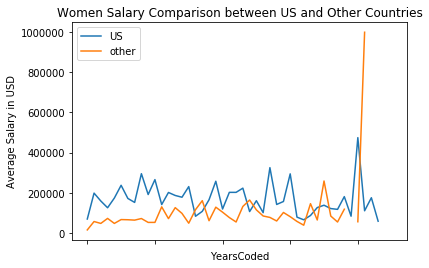

In [281]:
#Plot the Women Salary Comparison between US and Other countries
comparison_woman.groupby('US_or_other')['ConvertedComp'].plot(legend=True)
plt.title("Women Salary Comparison between US and Other Countries");
plt.xlabel('YearsCoded')
plt.ylabel('Average Salary in USD')

Text(0, 0.5, 'Average Salary in USD')

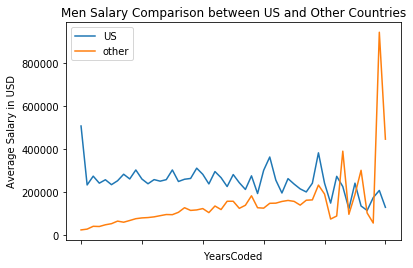

In [263]:
#Plot the Men Salary Comparison between US and Other countries
comparison_man.groupby('US_or_other')['ConvertedComp'].plot(legend=True)
plt.title("Men Salary Comparison between US and Other Countries");
plt.xlabel('YearsCoded')
plt.ylabel('Average Salary in USD')

Text(0, 0.5, 'Work remotely')

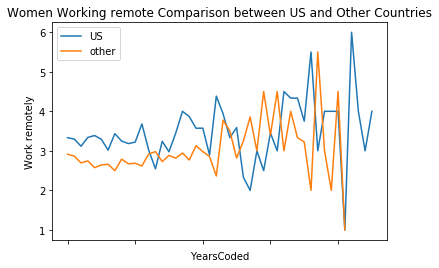

In [286]:
#Plot the Working remotely Comparison between US and other countries
comparison_woman.groupby('US_or_other')['WorkRemote'].plot(legend=True)
plt.title("Women Working remote Comparison between US and Other Countries");
plt.xlabel('YearsCoded')
plt.ylabel('Work remotely')

Text(0, 0.5, 'Work remotely')

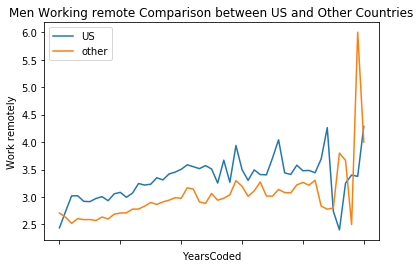

In [280]:
#Plot the Working remotely Comparison between US and other countries
comparison_man.groupby('US_or_other')['WorkRemote'].plot(legend=True)
plt.title("Men Working remote Comparison between US and Other Countries");
plt.xlabel('YearsCoded')
plt.ylabel('Work remotely')

In [264]:
comparison_woman.groupby('US_or_other').mean().ConvertedComp

US_or_other
US       166828.729978
other    108820.749603
Name: ConvertedComp, dtype: float64

In [265]:
comparison_man.groupby('US_or_other').mean().ConvertedComp

US_or_other
US       247604.133932
other    142798.143585
Name: ConvertedComp, dtype: float64

In [266]:
comparison_woman.groupby('US_or_other').mean().CareerSat

US_or_other
US       4.199857
other    3.900023
Name: CareerSat, dtype: float64

In [267]:
comparison_man.groupby('US_or_other').mean().CareerSat

US_or_other
US       4.306724
other    4.007648
Name: CareerSat, dtype: float64

In [268]:
comparison_woman.groupby('US_or_other').mean().JobSat

US_or_other
US       3.978828
other    3.676184
Name: JobSat, dtype: float64

In [269]:
comparison_man.groupby('US_or_other').mean().JobSat

US_or_other
US       3.909792
other    3.719016
Name: JobSat, dtype: float64

In [270]:
comparison_woman.groupby('US_or_other').mean().ConvertedComp/50

US_or_other
US       3336.574600
other    2176.414992
Name: ConvertedComp, dtype: float64

In [271]:
comparison_man.groupby('US_or_other').mean().ConvertedComp/50

US_or_other
US       4952.082679
other    2855.962872
Name: ConvertedComp, dtype: float64

Text(0, 0.5, 'Job Satisfaction')

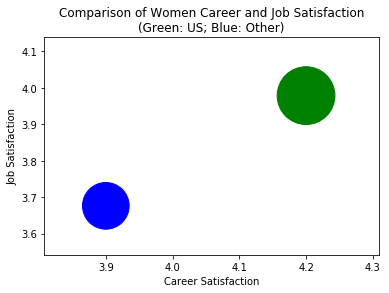

In [274]:
#Plot Comparison of Career and Job Satisfaction between Women in US and other parts of world
plt.scatter(comparison_woman.groupby('US_or_other').mean().CareerSat, comparison_woman.groupby('US_or_other').mean().JobSat, comparison_woman.groupby('US_or_other').mean().ConvertedComp/50, c=['green','blue'])

plt.title('Comparison of Women Career and Job Satisfaction\n(Green: US; Blue: Other)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

Text(0, 0.5, 'Job Satisfaction')

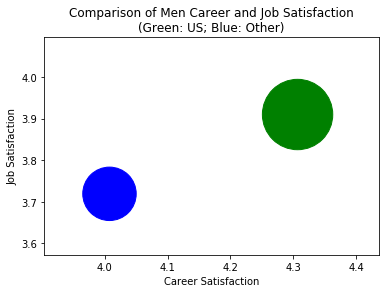

In [275]:
#Plot Comparison of Career and Job Satisfaction between Men in US and other parts of world
plt.scatter(comparison_man.groupby('US_or_other').mean().CareerSat, comparison_man.groupby('US_or_other').mean().JobSat, comparison_man.groupby('US_or_other').mean().ConvertedComp/50, c=['green','blue'])

plt.title('Comparison of Men Career and Job Satisfaction\n(Green: US; Blue: Other)')
plt.xlabel('Career Satisfaction')
plt.ylabel('Job Satisfaction')

In [276]:
comparison_woman.groupby('US_or_other').mean().WorkRemote

US_or_other
US       3.470499
other    3.045188
Name: WorkRemote, dtype: float64

In [277]:
comparison_man.groupby('US_or_other').mean().WorkRemote

US_or_other
US       3.330297
other    3.024352
Name: WorkRemote, dtype: float64

In [ ]:
RESULTS:
1. In 2019, United States has max number of programmers. Women programmers ratio to men is around 1: 10.
2. After comparing the salary between the Men and Women in US vs other countries, we found that the salary of US programmer - both Men and women is higher than the programmers from rest of the world until around years of coding experience.
The Women programmers are paid less than the men, even with same work experience.
The difference in salary for men in US vs other countries is higher than women.
3. We found that the Career and Job Satisfaction of Women programmers in US is higher than those of the rest of the world.
4. When comparing how often programmers work remotely, it looks like men in US work more remotely than rest of the world.
Women programmers tend to work remotely more after 20 year of work experience in US and rest of the world and this is probably the reason for more Career and job satisfaction.
